In [1]:
import pandas as pd


In [2]:
my_df = pd.DataFrame({"input1" : [15,41,44,47,50,53,56,59,99],
                     "input2" : [29,41,44,47,50,53,56,59,66]})

In [3]:
my_df

,input1,input2
0,15,29
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59
8,99,66


<Axes: >

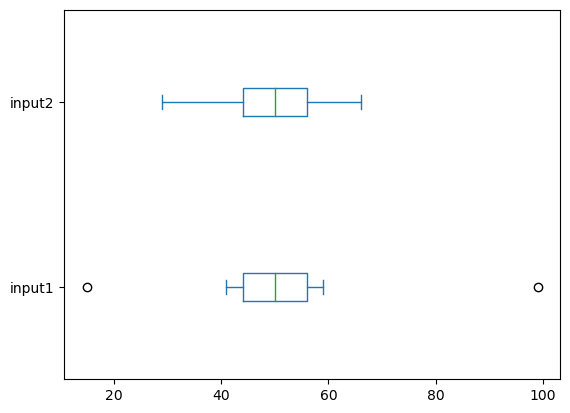

In [4]:
my_df.plot(kind = "box", vert=False)
#vert=false - it is horizontal rather than vertical
#input2 values are contained, but input1 has 2 values spread out

In [5]:
outlier_columns = ["input1", "input2"]

In [6]:
#Approach 1 - Boxplot approach
#Create a for loop

for column in outlier_columns:
    lower_quartile = my_df[column].quantile(0.25) #25 percentile/lower quartile
    upper_quartile = my_df[column].quantile(0.75) #25 percentile/lower quartile
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr*1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index

    print(f"{len(outliers)} outliers detected in column {column}")
    
    my_df.drop(outliers, inplace =True)

2 outliers detected in column input1
0 outliers detected in column input2


In [7]:
my_df
#The two rows with two outlier data points have been removed (row 0 and row 8)

,input1,input2
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59


In [9]:
#Approach 2 - STDV
my_df = pd.DataFrame({"input1" : [15,41,44,47,50,53,56,59,99],
                     "input2" : [29,41,44,47,50,53,56,59,66]})
for column in outlier_columns:
    mean = my_df[column].mean()
    std_dev = my_df[column].std()

    min_border = mean - std_dev*3
    max_border = mean + std_dev*3

    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index

    print(f"{len(outliers)} outliers detected in column {column}")
    
    my_df.drop(outliers, inplace =True)

0 outliers detected in column input1
0 outliers detected in column input2


In [ ]:
#No outliers here, and no rows have been dropped - We're dealing with such a small # of data points
#STDV is probably so large, that max/min extend out to 15 and 99 in input 1
#More data points around the mean would likely shrink STDV - easily identifying outliers

#Removing outliers should only be done if these data points will have material impact on the model
#